# Plot Team Ratings Rankings Movement (Adj vs UnAdj)

In [2]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *
data_DIR = "../data/misc/"
box_DIR = "../data/box/"
img_DIR_T = "../data/images/teams/"
df_teams = pd.read_csv("../data/NBA_teams_colors_logos.csv")
df_teams = df_teams.rename(columns={"teamTricode": "Team"})
black1 = '#252525'
black2 = '#222222'

## Luck Adjusted Ratings

In [ ]:
data = pd.read_csv(data_DIR + "nateluckadjustedratings.csv")

In [ ]:
data["OFF_R"] = data["ORtg"].rank(ascending=False  ,method="first").astype(int)
data["DEF_R"] = data["DRtg"].rank(ascending=True   ,method="first").astype(int)
data["NET_R"] = data["NRtg"].rank(ascending=False  ,method="first").astype(int)
data["aOFF_R"] = data["LA_ORTG"].rank(ascending=False,method="first").astype(int)
data["aDEF_R"] = data["LA_DRTG"].rank(ascending=True ,method="first").astype(int)
data["aNET_R"] = data["LA_NRTG"].rank(ascending=False,method="first").astype(int)

In [ ]:
results_plot = pd.merge(data, df_teams)

In [ ]:
results_plot.columns

In [ ]:
black1 = '#252525'
black2 = '#222222'

In [ ]:
p = (ggplot(results_plot)
 # Slight modifications for the original lines,
 # 1. Nudge the text to either sides of the points
 # 2. Alter the color and alpha values
 + geom_text(aes(1, 'DEF_R', label='nameTeam' ), nudge_x=-0.05, ha='right', size=10, color=black1)
 + geom_text(aes(2, 'aDEF_R', label='nameTeam'), nudge_x=0.05, ha='left', size=10, color=black1)
 + geom_point(aes(1, 'DEF_R', color='colorsTeam'), size=2.5, alpha=.7)
 + geom_point(aes(2, 'aDEF_R', color='colorsTeam'), size=2.5, alpha=.7)
 + geom_segment(aes(x=1, y='DEF_R', xend=2, yend='aDEF_R', color='colorsTeam'), alpha=.7, size=2)

 # Text Annotations
 #+ annotate('text', x=1, y=0, label='Rank in 1960', fontweight='bold', ha='right', size=10, color=black2)
 #+ annotate('text', x=2, y=0, label='Rank in 2015', fontweight='bold', ha='left', size=10, color=black2)
#  + annotate('text', x=1.5, y=0, label='Lines show change in rank', size=11, color=black1)
 + annotate('text', x=0.8, y=0, label='Unadjusted Def Rating Rank', size=11, color=black1)
 + annotate('text', x=2.2, y=0, label='SoS Adjusted Def Rating Rank', size=11, color=black1)
 #+ annotate('label', x=1.5, y=3, label='Lower infant\ndeath rates', size=9, color=black1,
 #           label_size=0, fontstyle='italic')
 #+ annotate('label', x=1.5, y=33, label='Higher infant\ndeath rates', size=9, color=black1,
 #           label_size=0, fontstyle='italic')

 # Prevent country names from being chopped off
 + lims(x=(0.35, 2.65))
#  + labs(color='Income Group')
 # Countries with lower rates on top
 + scale_y_reverse(breaks=np.arange(1,31,1))
 # Change colors
 + scale_color_identity(aesthetics=["color"])
 # Removes all decorations
 + theme_idv
 # Changing the figure size prevents the country names from squishing up
 + theme(figure_size=(8, 11))
 + theme(
     axis_title_x = element_blank(),
     axis_text_x = element_blank(),
     plot_title=element_text(face="bold", size=20),
 )
 + labs(
        title=f"Unadjusted vs Luck Adjusted Def Rating",
        subtitle = "Based on luck adjusted ratings used for PIPM",
        caption="Analysis: @knarsu3 | Table: @SravanNBA",
        y=f"Def Rating",
 )
)
p.save("../figs/team_leaders/LA_aDEF_mvmt.png", dpi=300, verbose = False)
p

## Ratings Removing the Best and Worst Games

In [ ]:
year = 2023
df1 = pd.read_parquet(box_DIR + f"NBA_Box_T_Adv_{year}.parquet")
df1 = df1.rename(columns={"teamTricode":"Team"})

In [ ]:
n = 5
df2 = df1.groupby("Team")
keys = list(df2.groups)
rat1,orat1,drat1 = [],[],[]
rat2,orat2,drat2 = [],[],[]
for key in keys:
    df3 = df2.get_group(key).sort_values("netRating",ascending=False).iloc[n:-n].reset_index(drop=True)
    df4 = df2.get_group(key).sort_values("netRating",ascending=False).reset_index(drop=True)
    rat1.append(round((df3["netRating"]*df3["possessions"]).sum()/df3["possessions"].sum(),2))
    rat2.append(round((df4["netRating"]*df4["possessions"]).sum()/df4["possessions"].sum(),2))
    orat1.append(round((df3["offensiveRating"]*df3["possessions"]).sum()/df3["possessions"].sum(),2))
    orat2.append(round((df4["offensiveRating"]*df4["possessions"]).sum()/df4["possessions"].sum(),2))
    drat1.append(round((df3["defensiveRating"]*df3["possessions"]).sum()/df3["possessions"].sum(),2))
    drat2.append(round((df4["defensiveRating"]*df4["possessions"]).sum()/df4["possessions"].sum(),2))

In [ ]:
df5 = pd.DataFrame({"Team":keys,"Net_Rating":rat1,"mNet_rating":rat2,"Off_Rating":orat1,"mOff_Rating":orat2,"Def_Rating":drat1,"mDef_Rating":drat2})
df5["Off_R"] = df5["Off_Rating"].rank(ascending=False  ,method="first").astype(int)
df5["Def_R"] = df5["Def_Rating"].rank(ascending=True   ,method="first").astype(int)
df5["Net_R"] = df5["Net_Rating"].rank(ascending=False  ,method="first").astype(int)
df5["mOff_R"] = df5["mOff_Rating"].rank(ascending=False  ,method="first").astype(int)
df5["mDef_R"] = df5["mDef_Rating"].rank(ascending=True   ,method="first").astype(int)
df5["mNet_R"] = df5["mNet_rating"].rank(ascending=False,method="first").astype(int)

In [ ]:
df6 = pd.merge(df5,df_teams,on="Team")
df6["image"]= img_DIR_T + df6["nameTeam"] + ".png"

In [ ]:
p = (ggplot(df6)
 # Slight modifications for the original lines,
 # 1. Nudge the text to either sides of the points
 # 2. Alter the color and alpha values
 + geom_text(aes(1, 'Net_R', label='nameTeam' ), nudge_x=-0.05, ha='right', size=10, color=black1)
 + geom_text(aes(2, 'mNet_R', label='nameTeam'), nudge_x=0.05, ha='left', size=10, color=black1)
 + geom_point(aes(1, 'Net_R', color='colorsTeam'), size=2.5, alpha=.7)
 + geom_point(aes(2, 'mNet_R', color='colorsTeam'), size=2.5, alpha=.7)
 + geom_segment(aes(x=1, y='Net_R', xend=2, yend='mNet_R', color='colorsTeam'), alpha=.7, size=2)
 + geom_image(aes(x=0.4, y='Net_R',image="image"),size=0.05)
 + geom_image(aes(x=2.6, y='mNet_R',image="image"),size=0.05)

 # Text Annotations
 #+ annotate('text', x=1, y=0, label='Rank in 1960', fontweight='bold', ha='right', size=10, color=black2)
 #+ annotate('text', x=2, y=0, label='Rank in 2015', fontweight='bold', ha='left', size=10, color=black2)
#  + annotate('text', x=1.5, y=0, label='Lines show change in rank', size=11, color=black1)
 + annotate('text', x=0.8, y=0, label='Net Rating Rank', size=11, color=black1)
 + annotate('text', x=2.2, y=0, label='Modified Net Rating Rank', size=11, color=black1)
 #+ annotate('label', x=1.5, y=3, label='Lower infant\ndeath rates', size=9, color=black1,
 #           label_size=0, fontstyle='italic')
 #+ annotate('label', x=1.5, y=33, label='Higher infant\ndeath rates', size=9, color=black1,
 #           label_size=0, fontstyle='italic')

 # Prevent country names from being chopped Net
 + lims(x=(0.35, 2.65))
#  + labs(color='Income Group')
 # Countries with lower rates on top
 + scale_y_reverse(breaks=np.arange(1,31,1))
 # Change colors
 + scale_color_identity(aesthetics=["color"])
 # Removes all decorations
 + theme_idv
 # Changing the figure size prevents the country names from squishing up
 + theme(figure_size=(8, 11))
 + theme(
     axis_title_x = element_blank(),
     axis_text_x = element_blank(),
     plot_title=element_text(face="bold", size=20),
     panel_border=element_blank(),
     axis_ticks=element_blank(),
 )
 + labs(
        title=f"Net Rating vs Modified Net Rating",
        subtitle = f"{n} Best and {n} Worst games removed for Modified Net Rating",
        caption="@SravanNBA | source:nba.com/stats",
        y=f"Net Rating",
 )
)
# p.save("../figs/team_leaders/m_Net_mvmt.png", dpi=300, verbose = False)
p

In [ ]:
dsf

## Net Rating, Cap Max at +25, Min at -25

In [3]:
year = 2023
df1 = pd.read_parquet(box_DIR + f"NBA_Box_T_Adv_{year}.parquet")
df1 = df1.rename(columns={"teamTricode":"Team"})

In [4]:
df2 = df1.groupby("Team")
keys = list(df2.groups)
rat1,orat1,drat1 = [],[],[]
rat2,orat2,drat2 = [],[],[]
for key in keys:
    df3 = df2.get_group(key)
    df3.loc[df3["netRating"] > 25,"netRating"] = 25
    df3.loc[df3["netRating"] < -25,"netRating"] = -25
    df4 = df2.get_group(key).sort_values("netRating",ascending=False).reset_index(drop=True)
    rat1.append(round((df3["netRating"]*df3["possessions"]).sum()/df3["possessions"].sum(),2))
    rat2.append(round((df4["netRating"]*df4["possessions"]).sum()/df4["possessions"].sum(),2))

In [5]:
df5 = pd.DataFrame({"Team":keys,"Net_Rating":rat1,"mNet_rating":rat2,})
df5["Net_R"] = df5["Net_Rating"].rank(ascending=False  ,method="first").astype(int)
df5["mNet_R"] = df5["mNet_rating"].rank(ascending=False,method="first").astype(int)

In [6]:
df6 = pd.merge(df5,df_teams,on="Team")
df6["image"]= img_DIR_T + df6["nameTeam"] + ".png"

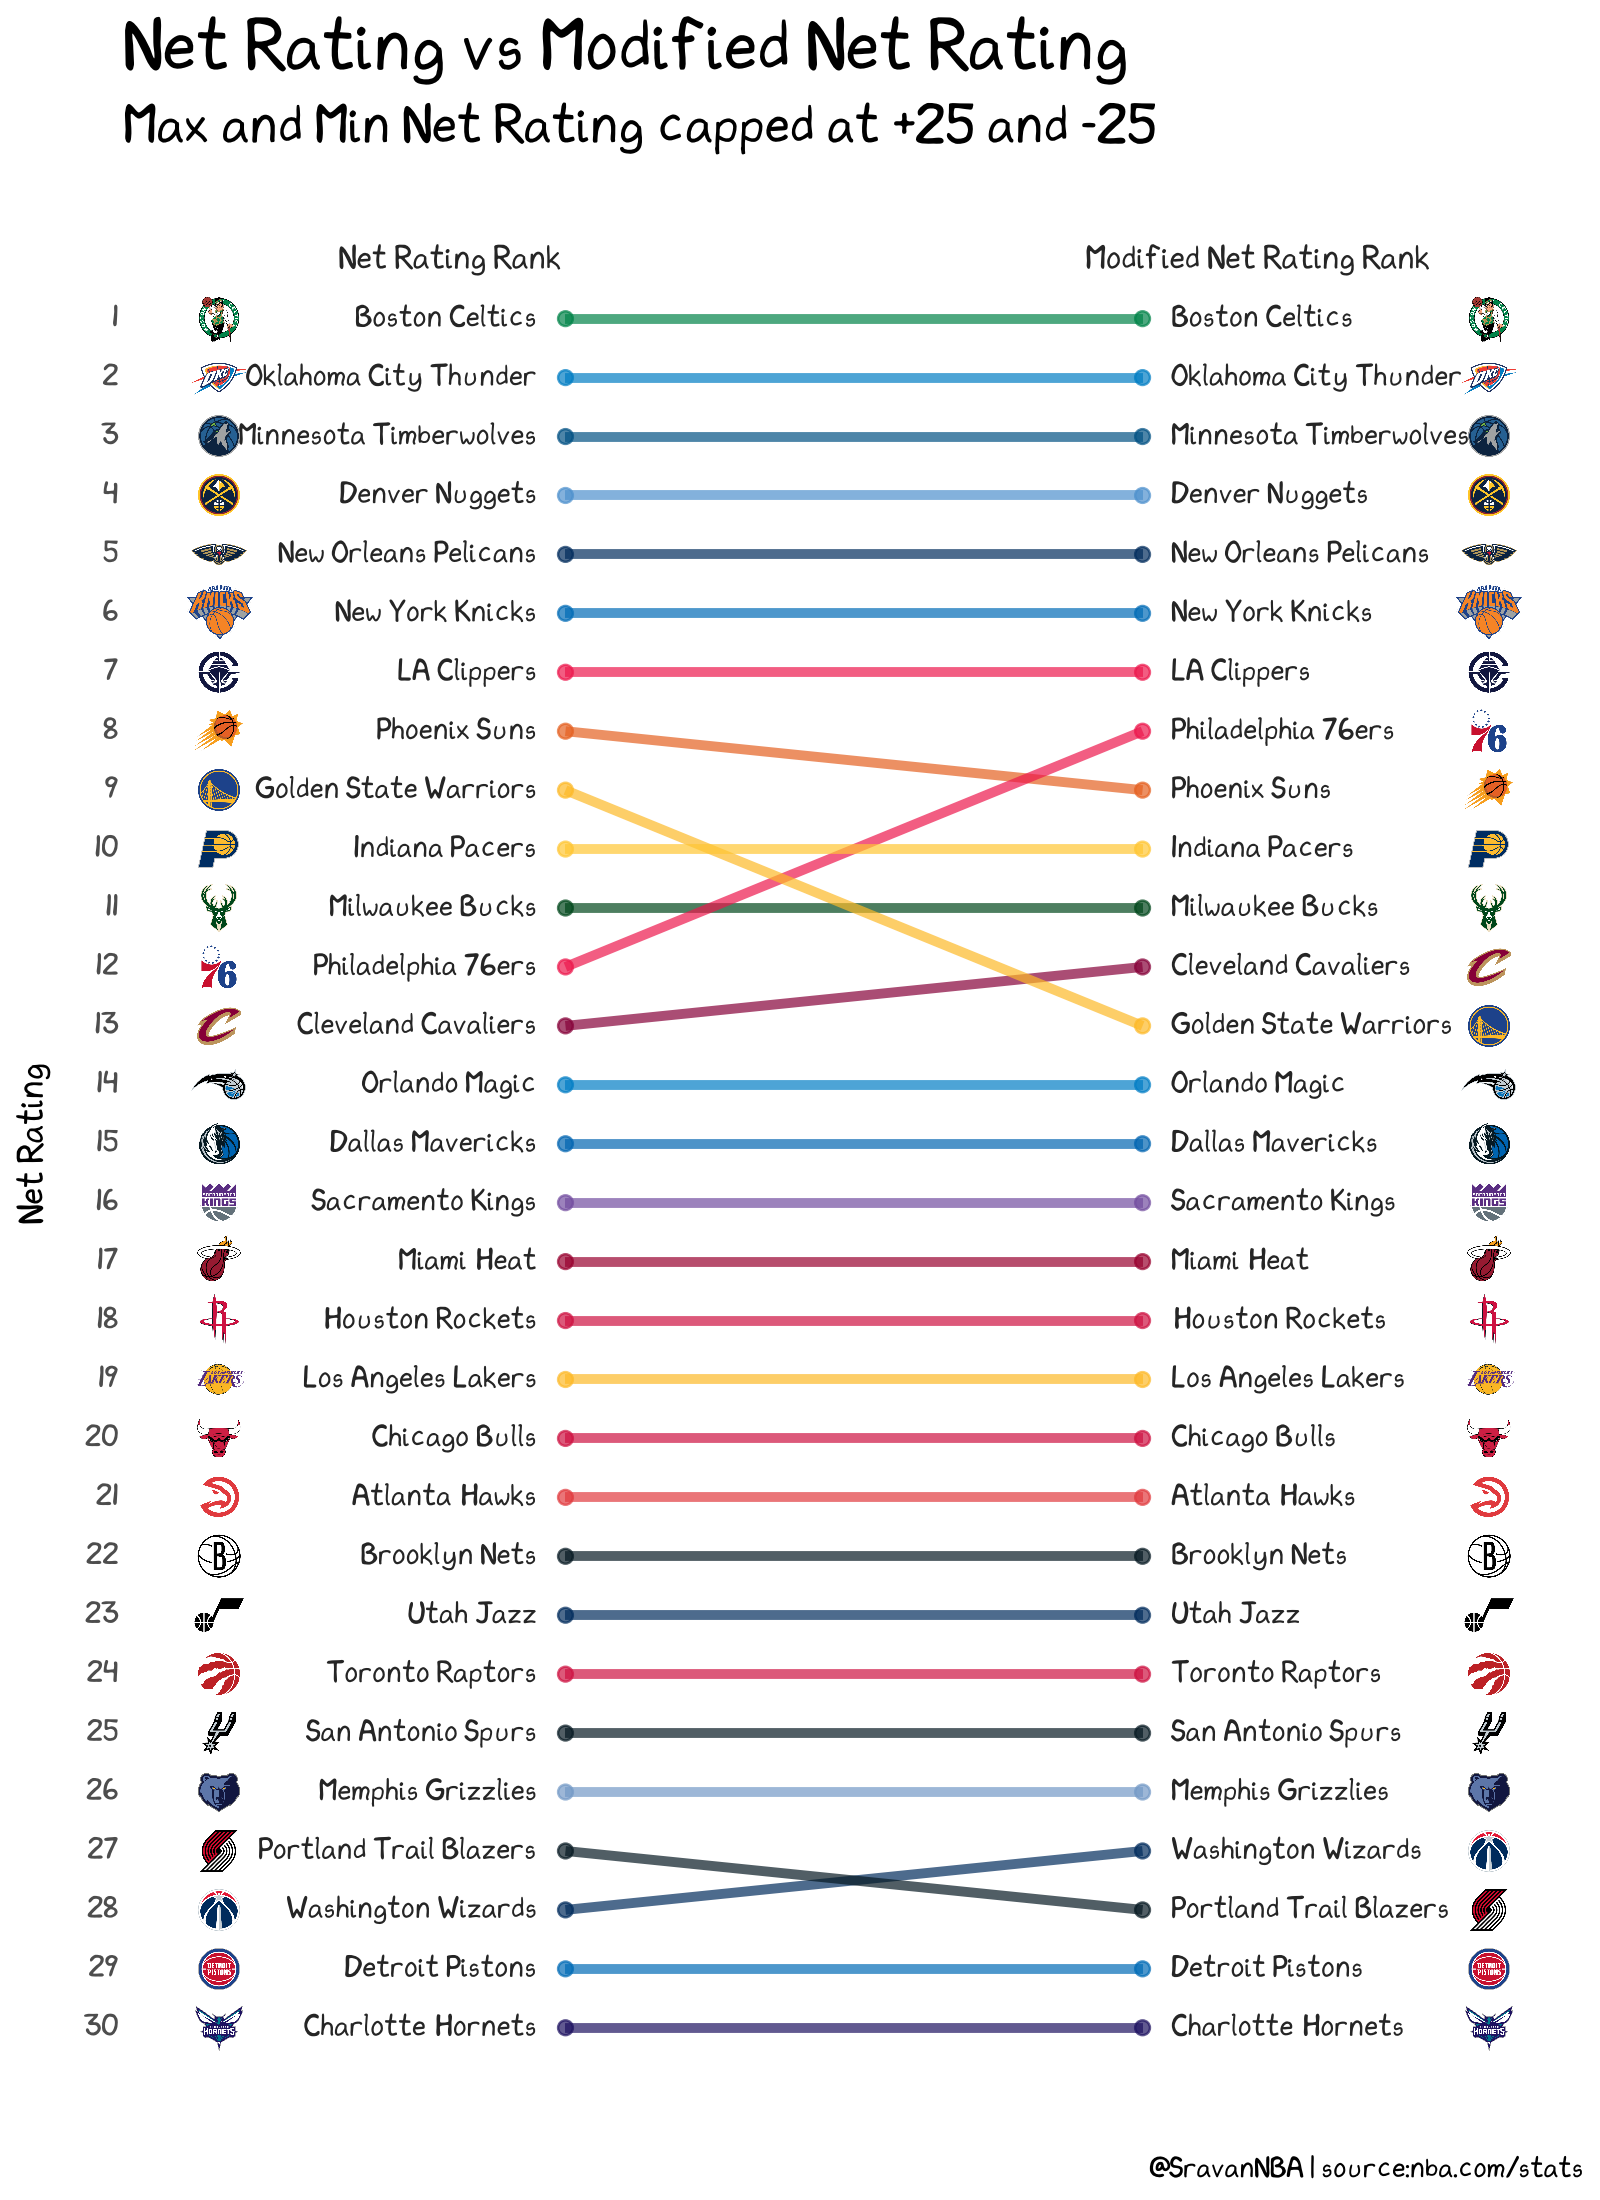

<Figure Size: (800 x 1100)>

In [7]:
p = (ggplot(df6)
 # Slight modifications for the original lines,
 # 1. Nudge the text to either sides of the points
 # 2. Alter the color and alpha values
 + geom_text(aes(1, 'Net_R', label='nameTeam' ), nudge_x=-0.05, ha='right', size=10, color=black1)
 + geom_text(aes(2, 'mNet_R', label='nameTeam'), nudge_x=0.05, ha='left', size=10, color=black1)
 + geom_point(aes(1, 'Net_R', color='colorsTeam'), size=2.5, alpha=.7)
 + geom_point(aes(2, 'mNet_R', color='colorsTeam'), size=2.5, alpha=.7)
 + geom_segment(aes(x=1, y='Net_R', xend=2, yend='mNet_R', color='colorsTeam'), alpha=.7, size=2)
 + geom_image(aes(x=0.4, y='Net_R',image="image"),size=0.05)
 + geom_image(aes(x=2.6, y='mNet_R',image="image"),size=0.05)

 # Text Annotations
 #+ annotate('text', x=1, y=0, label='Rank in 1960', fontweight='bold', ha='right', size=10, color=black2)
 #+ annotate('text', x=2, y=0, label='Rank in 2015', fontweight='bold', ha='left', size=10, color=black2)
#  + annotate('text', x=1.5, y=0, label='Lines show change in rank', size=11, color=black1)
 + annotate('text', x=0.8, y=0, label='Net Rating Rank', size=11, color=black1)
 + annotate('text', x=2.2, y=0, label='Modified Net Rating Rank', size=11, color=black1)
 #+ annotate('label', x=1.5, y=3, label='Lower infant\ndeath rates', size=9, color=black1,
 #           label_size=0, fontstyle='italic')
 #+ annotate('label', x=1.5, y=33, label='Higher infant\ndeath rates', size=9, color=black1,
 #           label_size=0, fontstyle='italic')

 # Prevent country names from being chopped Net
 + lims(x=(0.35, 2.65))
#  + labs(color='Income Group')
 # Countries with lower rates on top
 + scale_y_reverse(breaks=np.arange(1,31,1))
 # Change colors
 + scale_color_identity(aesthetics=["color"])
 # Removes all decorations
 + theme_idv
 # Changing the figure size prevents the country names from squishing up
 + theme(figure_size=(8, 11))
 + theme(
     axis_title_x = element_blank(),
     axis_text_x = element_blank(),
     plot_title=element_text(face="bold", size=24),
     plot_subtitle=element_text(size=18),
     panel_border=element_blank(),
     axis_ticks=element_blank(),
 )
 + labs(
        title=f"Net Rating vs Modified Net Rating",
        subtitle = f"Max and Min Net Rating capped at +25 and -25",
        caption="@SravanNBA | source:nba.com/stats",
        y=f"Net Rating",
 )
)
# p.save("../figs/team_leaders/m_Net_mvmt.png", dpi=300, verbose = False)
p